<a href="https://colab.research.google.com/github/meabhaykr/Mobile-Price-Range-Prediction/blob/main/Mobile_Price_Range_Prediction.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Project Name**    - Mobile Price Range Prediction

##### **Project Type**    - Classification
##### **Name**            - Abhay Kumar

# **Project Summary -**

### Import Libraries

In [41]:
# Import Libraries
import numpy as np
import pandas as pd

# Import Visualization libraries
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

# Import Warnings
import warnings
warnings.filterwarnings('ignore')

# Import model selection libraries
from sklearn.model_selection import train_test_split, GridSearchCV, RandomizedSearchCV
from sklearn.preprocessing import StandardScaler, MinMaxScaler

# Importing Models
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC

# Importing Metric Evaluation Libraries
from sklearn.metrics import (
    accuracy_score, classification_report, confusion_matrix,
    ConfusionMatrixDisplay, roc_curve, roc_auc_score, auc
)

### Dataset Loading

In [42]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [43]:
mobile_df = pd.read_csv('/content/drive/MyDrive/AlmaBetter/Project/Mobile Price Range Prediction/Data mobile price range.csv')

### Dataset First View

In [44]:
# Dataset First Look
mobile_df.head()

,battery_power,blue,clock_speed,dual_sim,fc,four_g,int_memory,m_dep,mobile_wt,n_cores,...,px_height,px_width,ram,sc_h,sc_w,talk_time,three_g,touch_screen,wifi,price_range
0,842,0,2.2,0,1,0,7,0.6,188,2,...,20,756,2549,9,7,19,0,0,1,1
1,1021,1,0.5,1,0,1,53,0.7,136,3,...,905,1988,2631,17,3,7,1,1,0,2
2,563,1,0.5,1,2,1,41,0.9,145,5,...,1263,1716,2603,11,2,9,1,1,0,2
3,615,1,2.5,0,0,0,10,0.8,131,6,...,1216,1786,2769,16,8,11,1,0,0,2
4,1821,1,1.2,0,13,1,44,0.6,141,2,...,1208,1212,1411,8,2,15,1,1,0,1


### Dataset Rows & Columns count

In [45]:
# Dataset Rows & Columns count
mobile_df.shape

(2000, 21)

In [46]:
num_rows = mobile_df.shape[0]
num_columns = mobile_df.shape[1]
print(f'The dataset contains \nNumber of rows : {num_rows} \nNumber of columns :{num_columns}')

The dataset contains 
Number of rows : 2000 
Number of columns :21


### Dataset Information

In [47]:
# Dataset Info
mobile_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2000 entries, 0 to 1999
Data columns (total 21 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   battery_power  2000 non-null   int64  
 1   blue           2000 non-null   int64  
 2   clock_speed    2000 non-null   float64
 3   dual_sim       2000 non-null   int64  
 4   fc             2000 non-null   int64  
 5   four_g         2000 non-null   int64  
 6   int_memory     2000 non-null   int64  
 7   m_dep          2000 non-null   float64
 8   mobile_wt      2000 non-null   int64  
 9   n_cores        2000 non-null   int64  
 10  pc             2000 non-null   int64  
 11  px_height      2000 non-null   int64  
 12  px_width       2000 non-null   int64  
 13  ram            2000 non-null   int64  
 14  sc_h           2000 non-null   int64  
 15  sc_w           2000 non-null   int64  
 16  talk_time      2000 non-null   int64  
 17  three_g        2000 non-null   int64  
 18  touch_sc

#### Duplicate Values

In [48]:
# Dataset Duplicate Value Count
duplicated_count = mobile_df.duplicated().sum()
duplicated_count

0

#### Dataset doesn't contain any duplicate values

#### Missing Values/Null Values

In [49]:
# Missing Values/Null Values Count
missing_values_count = mobile_df.isnull().sum()
missing_values_count

battery_power    0
blue             0
clock_speed      0
dual_sim         0
fc               0
four_g           0
int_memory       0
m_dep            0
mobile_wt        0
n_cores          0
pc               0
px_height        0
px_width         0
ram              0
sc_h             0
sc_w             0
talk_time        0
three_g          0
touch_screen     0
wifi             0
price_range      0
dtype: int64

#### There are no null values in the dataset

In [50]:
#Description of the data
mobile_df.describe().T

,count,mean,std,min,25%,50%,75%,max
battery_power,2000.0,1238.51850,439.418206,501.0,851.75,1226.0,1615.25,1998.0
blue,2000.0,0.49500,0.500100,0.0,0.00,0.0,1.00,1.0
clock_speed,2000.0,1.52225,0.816004,0.5,0.70,1.5,2.20,3.0
dual_sim,2000.0,0.50950,0.500035,0.0,0.00,1.0,1.00,1.0
fc,2000.0,4.30950,4.341444,0.0,1.00,3.0,7.00,19.0
four_g,2000.0,0.52150,0.499662,0.0,0.00,1.0,1.00,1.0
int_memory,2000.0,32.04650,18.145715,2.0,16.00,32.0,48.00,64.0
m_dep,2000.0,0.50175,0.288416,0.1,0.20,0.5,0.80,1.0
mobile_wt,2000.0,140.24900,35.399655,80.0,109.00,141.0,170.00,200.0
n_cores,2000.0,4.52050,2.287837,1.0,3.00,4.0,7.00,8.0


Anomalies, observed in attributes like front camera, primary camera, sc_width, and px_height, where minimum values of 0 are present, deviate from typical mobile device specifications. Addressing and rectifying these discrepancies is crucial to maintain the integrity of the data and ensure it aligns with realistic mobile device characteristics.

In [51]:
# Dataset Columns
mobile_df.columns

Index(['battery_power', 'blue', 'clock_speed', 'dual_sim', 'fc', 'four_g',
       'int_memory', 'm_dep', 'mobile_wt', 'n_cores', 'pc', 'px_height',
       'px_width', 'ram', 'sc_h', 'sc_w', 'talk_time', 'three_g',
       'touch_screen', 'wifi', 'price_range'],
      dtype='object')

In [52]:
# Numerical Columns
Numerical_columns = mobile_df.describe().columns
Numerical_columns

Index(['battery_power', 'blue', 'clock_speed', 'dual_sim', 'fc', 'four_g',
       'int_memory', 'm_dep', 'mobile_wt', 'n_cores', 'pc', 'px_height',
       'px_width', 'ram', 'sc_h', 'sc_w', 'talk_time', 'three_g',
       'touch_screen', 'wifi', 'price_range'],
      dtype='object')

In [53]:
# Categorical Columns
Categorical_columns = mobile_df.select_dtypes(include=['object','category']).columns
Categorical_columns

Index([], dtype='object')

##**Unique Value Check**

In [54]:
# Check Unique Values for each variable.
mobile_df.nunique()

battery_power    1094
blue                2
clock_speed        26
dual_sim            2
fc                 20
four_g              2
int_memory         63
m_dep              10
mobile_wt         121
n_cores             8
pc                 21
px_height        1137
px_width         1109
ram              1562
sc_h               15
sc_w               19
talk_time          19
three_g             2
touch_screen        2
wifi                2
price_range         4
dtype: int64

The target variable, Price Range, is a multiclass category with four distinct values.

##**Data Wrangling**

The presence of minimum values of 0 in attributes such as front camera, primary camera, sc_width, and px_height is inconsistent with the typical specifications of mobile devices, suggesting a potential data discrepancy. It is necessary to address and handle these anomalies to ensure the data accurately reflects realistic mobile device characteristics.

In [55]:
zero_fc_count = mobile_df.query('fc == 0').shape[0]
print(zero_fc_count)

474


The observations with a primary camera megapixel value of 0 might indicate mobile phones that lack a primary camera. It is essential to consider this scenario when interpreting the dataset, as a value of zero in this context could signify the absence of the primary camera feature rather than a data anomaly.

In [56]:
# Checking How many observations having Pixel Resolution Height value as 0.

print(mobile_df[mobile_df['px_height']==0].shape[0])

2


In [57]:
mobile_df[mobile_df['px_height']==0]

,battery_power,blue,clock_speed,dual_sim,fc,four_g,int_memory,m_dep,mobile_wt,n_cores,...,px_height,px_width,ram,sc_h,sc_w,talk_time,three_g,touch_screen,wifi,price_range
1481,1834,0,2.1,0,7,1,40,0.1,99,4,...,0,1987,3692,13,0,16,1,1,0,3
1933,897,1,2.0,0,3,1,2,0.6,154,8,...,0,994,1958,7,5,7,1,1,0,1


In [58]:
# Dropping these 2 rows and again resetting the index

mobile_df.drop([1481,1933],axis=0,inplace=True)
mobile_df.reset_index(drop=True, inplace=True)

In [59]:
# Checking How many observations having Screen Width value as 0.

print(mobile_df[mobile_df['sc_w']==0].shape[0])

179


It is highly unlikely for a mobile phone's screen width (Sc_width) to be 0, and the presence of 179 such records suggests a potential data issue. Imputation or correction methods should be applied to address these anomalies and ensure the dataset accurately reflects realistic values for mobile device attributes.

**Replacing Null Values**

In [60]:
# Replacing 0 with NAN so that we can implement KNN Imputer.

mobile_df['sc_w'].replace(0,np.nan,inplace=True)

Utilizing the KNN method for imputation, the KNN Imputer takes into account the values of the k-nearest neighbors to estimate and fill in missing values for each data point within the specified column. This approach leverages the information from neighboring data instances to enhance the accuracy of imputed values in the dataset

In [61]:
# import KNN imputer from sklearn

from sklearn.impute import KNNImputer
impute_knn = KNNImputer(n_neighbors=1)
mobile_df=pd.DataFrame(impute_knn.fit_transform(mobile_df),columns = mobile_df.columns)

In [62]:
# Checking How many observations having sc_w value as 0.

mobile_df[mobile_df['sc_w']==0].shape[0]

0

In [63]:
mobile_df.shape

(1998, 21)

**All inconsistencies in the dataset, including rectifying values that deviated from expected ranges, have been addressed and corrected.**}

## **Outlier Detection**

Outliers refer to data points that exhibit substantial deviation from the typical pattern observed in the majority of the dataset. These exceptional data points reside considerably distant from the central tendency, positioned either at the extremes of the value range, higher or lower than the typical distribution

In [64]:
# Creating the list Columns which may contain outliers
possible_outlier_columns = mobile_df.select_dtypes(include='number').columns.tolist()
possible_outlier_columns = [col for col in possible_outlier_columns if col not in {'blue', 'dual_sim', 'four_g', 'three_g', 'touch_screen', 'wifi', 'price_range'}]
possible_outlier_columns

['battery_power',
 'clock_speed',
 'fc',
 'int_memory',
 'm_dep',
 'mobile_wt',
 'n_cores',
 'pc',
 'px_height',
 'px_width',
 'ram',
 'sc_h',
 'sc_w',
 'talk_time']

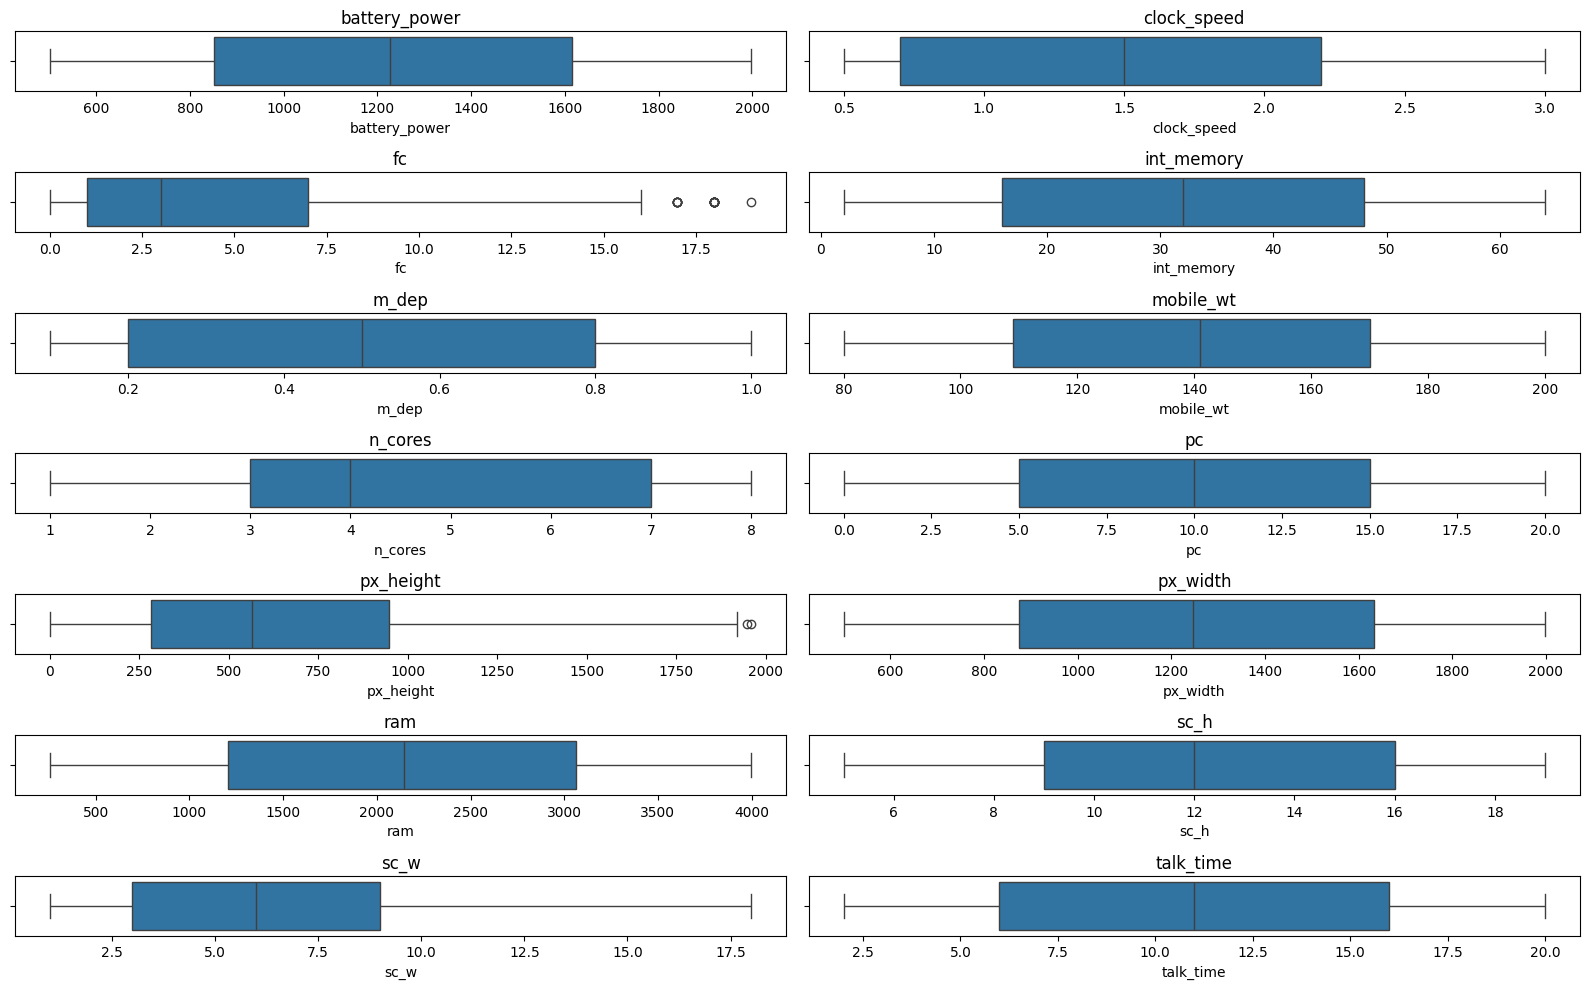

In [65]:
plt.figure(figsize=(16, 10))

num_cols = 2
num_rows = len(possible_outlier_columns) // num_cols + len(possible_outlier_columns) % num_cols

for index, item in enumerate(possible_outlier_columns):
    plt.subplot(num_rows, num_cols, index+1)
    sns.boxplot(x=mobile_df[item])
    plt.title(item)

plt.tight_layout()
plt.show()


**Outliers are observed in the 'fc' and 'px_width' columns based on the boxplot visualizations.**

In [66]:
# Creating a list of Columns that contain Outliers

Col_with_outliers = ['fc','px_height']
Col_with_outliers


['fc', 'px_height']

In [67]:
Q1 = mobile_df[Col_with_outliers].quantile(0.25)
Q3 = mobile_df[Col_with_outliers].quantile(0.75)
IQR = Q3-Q1
IQR.T

fc             6.00
px_height    663.75
dtype: float64

In [68]:
# Calculating the Upperside and Lowerside Outlier

Upper_Whisker = Q3 + (1.5*IQR)
Lower_Whisker = Q1 - (1.5*IQR)

In [69]:
Upper_Whisker

fc             16.000
px_height    1943.375
dtype: float64

In [70]:
Lower_Whisker

fc            -8.000
px_height   -711.625
dtype: float64

In [71]:
# Filtering the outliers from the dataframe

mobile_df[Col_with_outliers] = mobile_df[Col_with_outliers][~((mobile_df[Col_with_outliers] < Lower_Whisker) | (mobile_df[Col_with_outliers] > Upper_Whisker))]

In [72]:
mobile_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1998 entries, 0 to 1997
Data columns (total 21 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   battery_power  1998 non-null   float64
 1   blue           1998 non-null   float64
 2   clock_speed    1998 non-null   float64
 3   dual_sim       1998 non-null   float64
 4   fc             1980 non-null   float64
 5   four_g         1998 non-null   float64
 6   int_memory     1998 non-null   float64
 7   m_dep          1998 non-null   float64
 8   mobile_wt      1998 non-null   float64
 9   n_cores        1998 non-null   float64
 10  pc             1998 non-null   float64
 11  px_height      1996 non-null   float64
 12  px_width       1998 non-null   float64
 13  ram            1998 non-null   float64
 14  sc_h           1998 non-null   float64
 15  sc_w           1998 non-null   float64
 16  talk_time      1998 non-null   float64
 17  three_g        1998 non-null   float64
 18  touch_sc

In [73]:
# Replacing the null values which created due to outlier removal

mobile_df['fc'].fillna(mobile_df['fc'].median(),inplace=True)
mobile_df['px_height'].fillna(mobile_df['px_height'].median(),inplace=True)

**These columns  have skewed distributions or the presence of outliers. When dealing with skewed data or outliers, mean imputation can be sensitive to extreme values, potentially leading to biased results. In such cases, using the median as a central measure is more robust, as it is less affected by extreme values.**

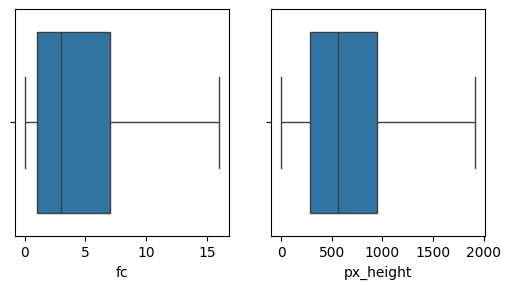

In [74]:
plt.figure(figsize=(16,10))
for index,item in enumerate(Col_with_outliers):
  plt.subplot(3,5,index+1)
  sns.boxplot(x=mobile_df[item], data=mobile_df)

**I have effectively eliminated the outliers**.

##**Feature Engineering**

In [75]:
# Creating a new feature based on given features sc_h  and sc_w  to represent overall Display Size

mobile_df['Display_size'] = mobile_df['sc_h'] * mobile_df['sc_w']

In [76]:
# Creatin a new feature based on given features px_height and px_width to represent Display Resolution area

mobile_df['Total_Pixels'] = mobile_df['px_height'] * mobile_df['px_width']

In [77]:
# Dropping unnecessary columns from the dataset

mobile_df.drop(['sc_h','sc_w','px_height','px_width'],axis=1,inplace=True)

In [78]:
mobile_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1998 entries, 0 to 1997
Data columns (total 19 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   battery_power  1998 non-null   float64
 1   blue           1998 non-null   float64
 2   clock_speed    1998 non-null   float64
 3   dual_sim       1998 non-null   float64
 4   fc             1998 non-null   float64
 5   four_g         1998 non-null   float64
 6   int_memory     1998 non-null   float64
 7   m_dep          1998 non-null   float64
 8   mobile_wt      1998 non-null   float64
 9   n_cores        1998 non-null   float64
 10  pc             1998 non-null   float64
 11  ram            1998 non-null   float64
 12  talk_time      1998 non-null   float64
 13  three_g        1998 non-null   float64
 14  touch_screen   1998 non-null   float64
 15  wifi           1998 non-null   float64
 16  price_range    1998 non-null   float64
 17  Display_size   1998 non-null   float64
 18  Total_Pi

In [79]:
mobile_df.head()

,battery_power,blue,clock_speed,dual_sim,fc,four_g,int_memory,m_dep,mobile_wt,n_cores,pc,ram,talk_time,three_g,touch_screen,wifi,price_range,Display_size,Total_Pixels
0,842.0,0.0,2.2,0.0,1.0,0.0,7.0,0.6,188.0,2.0,2.0,2549.0,19.0,0.0,0.0,1.0,1.0,63.0,15120.0
1,1021.0,1.0,0.5,1.0,0.0,1.0,53.0,0.7,136.0,3.0,6.0,2631.0,7.0,1.0,1.0,0.0,2.0,51.0,1799140.0
2,563.0,1.0,0.5,1.0,2.0,1.0,41.0,0.9,145.0,5.0,6.0,2603.0,9.0,1.0,1.0,0.0,2.0,22.0,2167308.0
3,615.0,1.0,2.5,0.0,0.0,0.0,10.0,0.8,131.0,6.0,9.0,2769.0,11.0,1.0,0.0,0.0,2.0,128.0,2171776.0
4,1821.0,1.0,1.2,0.0,13.0,1.0,44.0,0.6,141.0,2.0,14.0,1411.0,15.0,1.0,1.0,0.0,1.0,16.0,1464096.0


## **Data Visualizations**

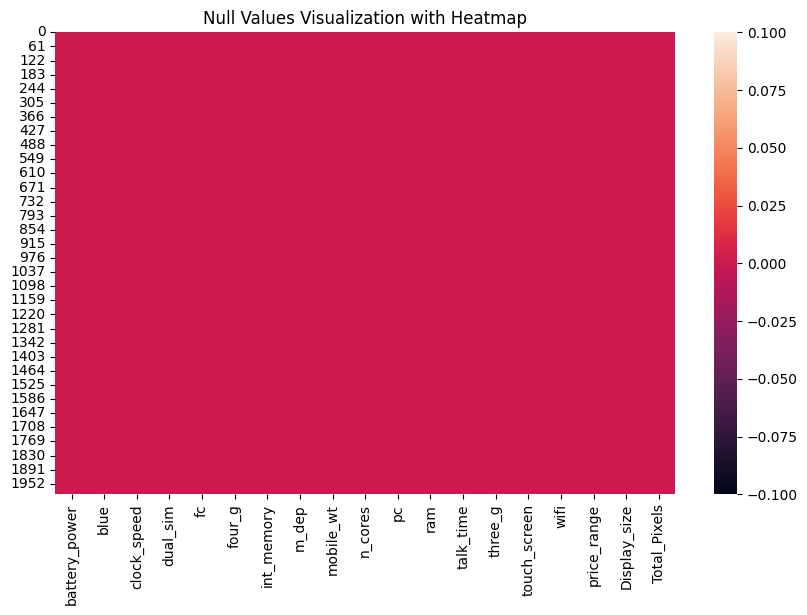

In [82]:
# Visualizing the missing values
plt.figure(figsize=(10,6))
sns.heatmap(mobile_df.isnull())
plt.title('Null Values Visualization with Heatmap')
plt.show()

The dataset comprises 2,000 records distributed across 21 columns, exhibiting a clean structure with no instances of null values or duplicated entries.

**1.Relationship between ram and price_range**

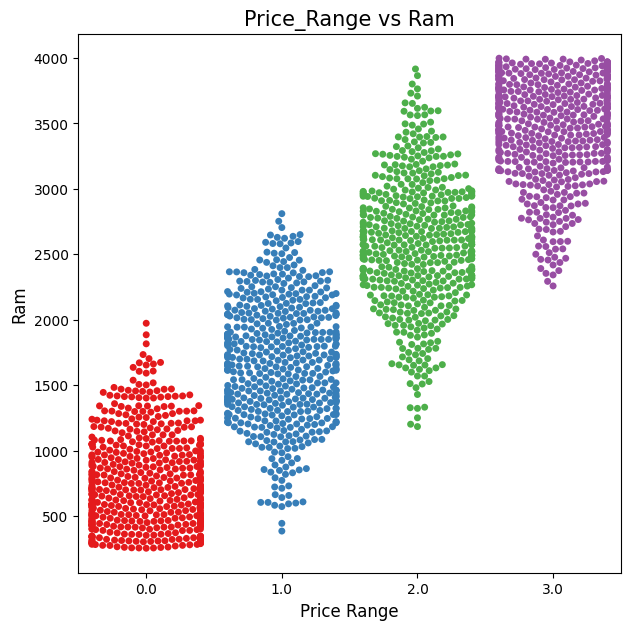

In [83]:
plt.figure(figsize=(7, 7))
sns.swarmplot(x=mobile_df['price_range'], y=mobile_df['ram'], palette='Set1')
plt.title('Price_Range vs Ram', size=15)
plt.xlabel('Price Range', size=12)
plt.ylabel('Ram', size=12)
plt.show()

I have selected a Swarm Chart to visually compare the RAM quantities across different Price Ranges. Swarm Charts are especially effective for presenting categorical or discrete data points. The mobile phones exhibit a notable variation in price ranges, with some featuring ample RAM, and others offering more modest capacities.
* **A discernible trend is observed, indicating that higher RAM capacities correspond to higher mobile device prices.**

**2.Price Range vs Battery Power**

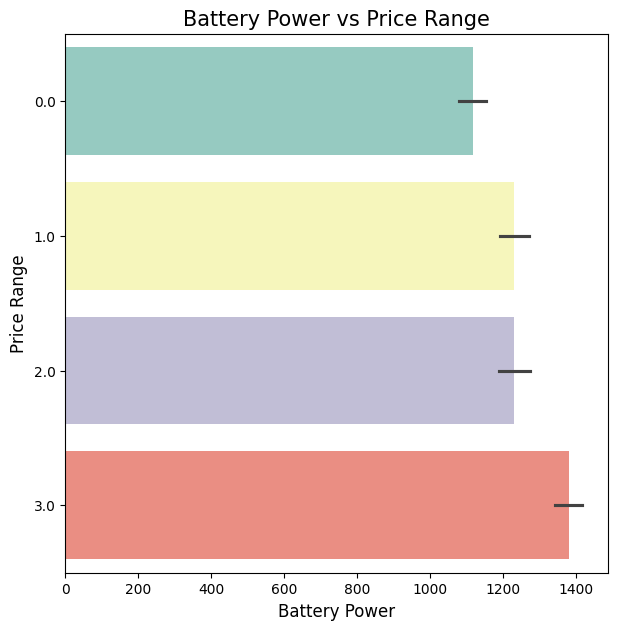

In [84]:
plt.figure(figsize=(7, 7))
sns.barplot(x=mobile_df['battery_power'], y=mobile_df['price_range'], palette='Set3', orient='h')
plt.title('Battery Power vs Price Range', size=15)
plt.xlabel('Battery Power', size=12)
plt.ylabel('Price Range', size=12)
plt.show()

**Insights**
* I chose a specific chart to visually compare Battery Power values across different Price Ranges.
* Bar charts excel at displaying categorical or discrete data points, making them ideal for this analysis.
* Mobile phones are available in various price ranges, showcasing differences in battery power.
* Some phones boast high battery power, while others have a more modest capacity.
* Notably, a straightforward trend emerges  higher battery power correlates with a higher cost for the mobile phone.

**3.Relationship : Price Range vs Display Resolution**

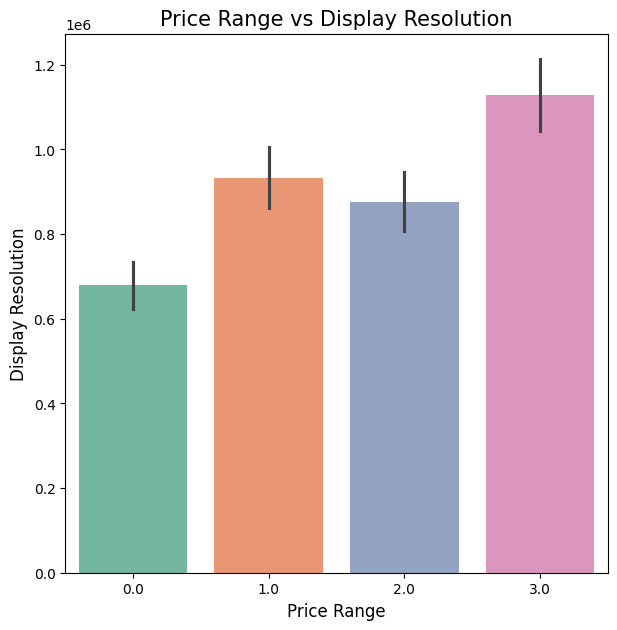

In [85]:
plt.figure(figsize=(7, 7))
new_palette = sns.color_palette("Set2", n_colors=4)
sns.barplot(x=mobile_df['price_range'], y=mobile_df['Total_Pixels'], palette=new_palette)
plt.title('Price Range vs Display Resolution', size=15)
plt.xlabel('Price Range', size=12)
plt.ylabel('Display Resolution', size=12)
plt.show()

**Insights**
* I opted for a specific chart to effectively display and compare Total Pixels across diverse Price Ranges.
* Bar charts are well-suited for presenting categorical or distinct data points, making them an ideal choice for this analysis.
* Mobile devices are available in a wide range of price categories, showcasing differences in Total Pixels.
* Some devices exhibit impressive High Display Resolutions, characterized by a higher pixel count, while others have lower counts.
* A noticeable correlation emerges: devices with greater Total Pixels typically carry a higher price tag.

**4.Relationship : Display vs Size**

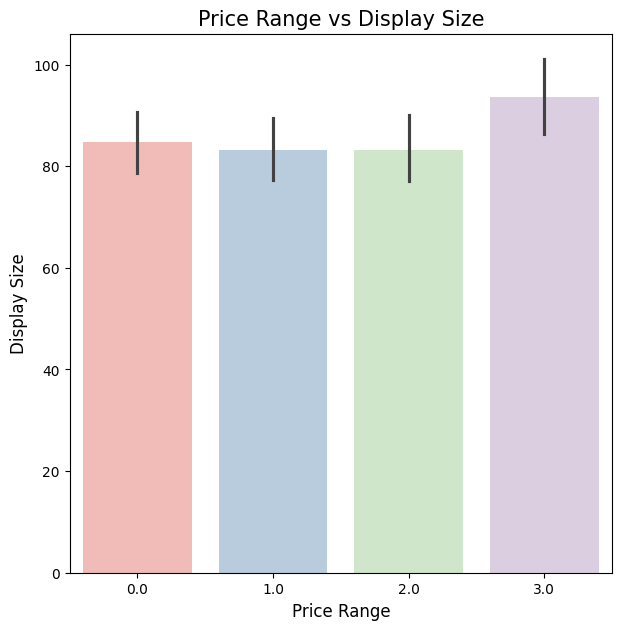

In [86]:
plt.figure(figsize=(7, 7))
new_palette = sns.color_palette("Pastel1", n_colors=4)
sns.barplot(x=mobile_df['price_range'], y=mobile_df['Display_size'], palette=new_palette)
plt.title('Price Range vs Display Size', size=15)
plt.xlabel('Price Range', size=12)
plt.ylabel('Display Size', size=12)
plt.show()

**Insights:**
* I specifically opted for a chart to visualize and compare Display Size across diverse Price Ranges effectively.
* Bar charts excel in presenting categorical or distinct data points, making them apt for this analysis.
* Display Size, while not the dominant factor in determining Price Range fluctuations, holds significance.
* Notably, choosing a larger Display Size for a mobile phone is associated with a slightly elevated cost.
* This observation adds nuance to the relationship between Display Size and its impact on mobile phone pricing.

**5.Univariate Analysis of Binary Categorical Variables**

A donut chart, also known as a doughnut chart, is a type of graph used for visualizing data in a circular format. It is particularly useful for univariate analysis of binary categorical variables, where the data can be divided into two categories or classes. Here's an explanation of how a donut chart is used for such analysis:

**Representation of Binary Categorical Variables**:

Binary categorical variables have two possible outcomes or classes, such as "Yes" or "No," "True" or "False," or "Success" or "Failure."

**Circular Visualization:**

A donut chart is a circular chart with a hole in the center, resembling a donut. The outer ring represents the whole data set, and the inner hole can be utilized for additional information or labels.
Proportion Display:

In the context of binary categorical variables, the donut chart illustrates the proportion or percentage distribution of each category within the entire dataset.

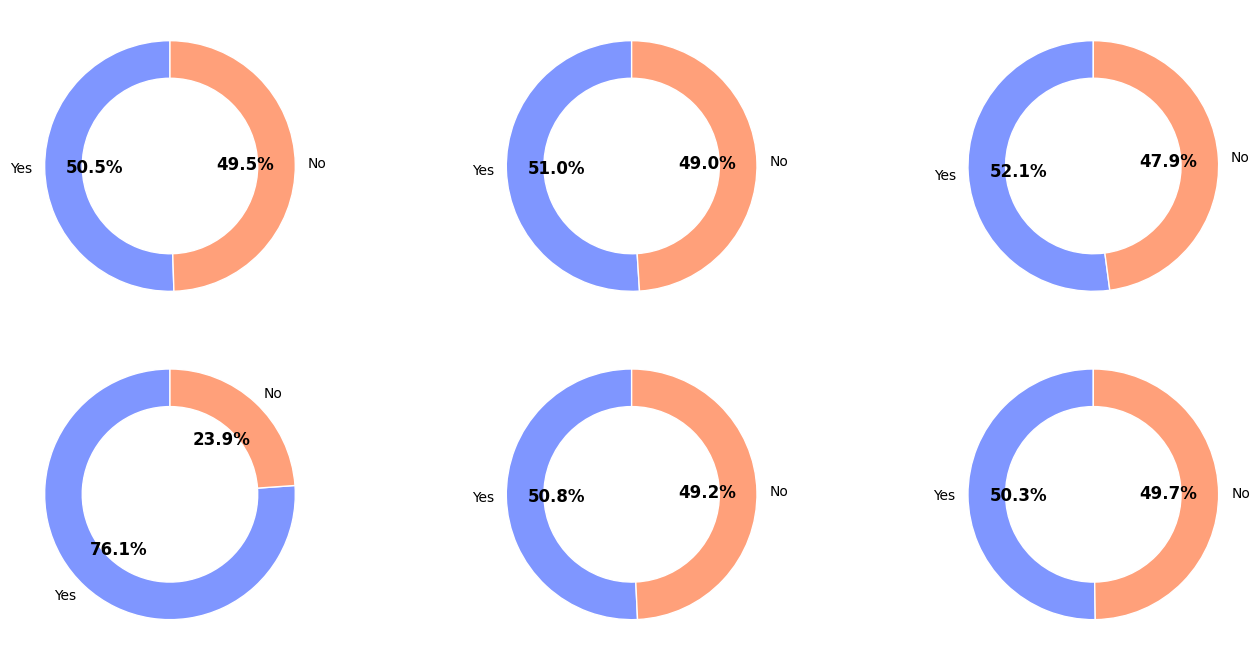

In [87]:


plt.figure(figsize=(14, 10))

rows = 3
col = 3
count = 1
var_list = ['blue', 'dual_sim', 'four_g', 'three_g', 'wifi', 'touch_screen']
labels = ['Yes', 'No']
colors = ['#7f96ff', '#ffa07a']  # Change colors to your preferred ones

for var in var_list:
    plt.subplot(rows, col, count)
    data = mobile_df[var].value_counts()
    wedges, texts, autotexts = plt.pie(data, autopct='%1.1f%%', startangle=90, colors=colors, labels=labels, wedgeprops=dict(width=0.3))

    # Make it a donut chart
    for wedge in wedges:
        wedge.set_edgecolor('white')

    plt.setp(autotexts, size=12, weight="bold")

    # Draw a white circle in the center to create a donut chart
    centre_circle = plt.Circle((0, 0), 0.60, fc='white')
    fig = plt.gcf()
    fig.gca().add_artist(centre_circle)

    plt.tight_layout()
    count += 1

plt.show()

**Insights:**
* I've opted for a specific chart to conduct univariate analysis on binary categorical variables like Bluetooth, Dual SIM, 4G, WiFi, and Touch Screen to comprehend the distribution of mobile phones in each category.

* The analysis unveils that the percentage distribution across Bluetooth, Dual SIM, 4G, WiFi, and Touch Screen functionalities is nearly equal, with each category representing approximately 50% of the total.

* Interestingly, a marginal portion, accounting for only 23.8%, of mobile phones lacks Three_g functionality, indicating that the vast majority of devices in the dataset are equipped with 3G capability.

**6. Understand the relationship between Price Range which is our dependent variable and other Continous variables.**

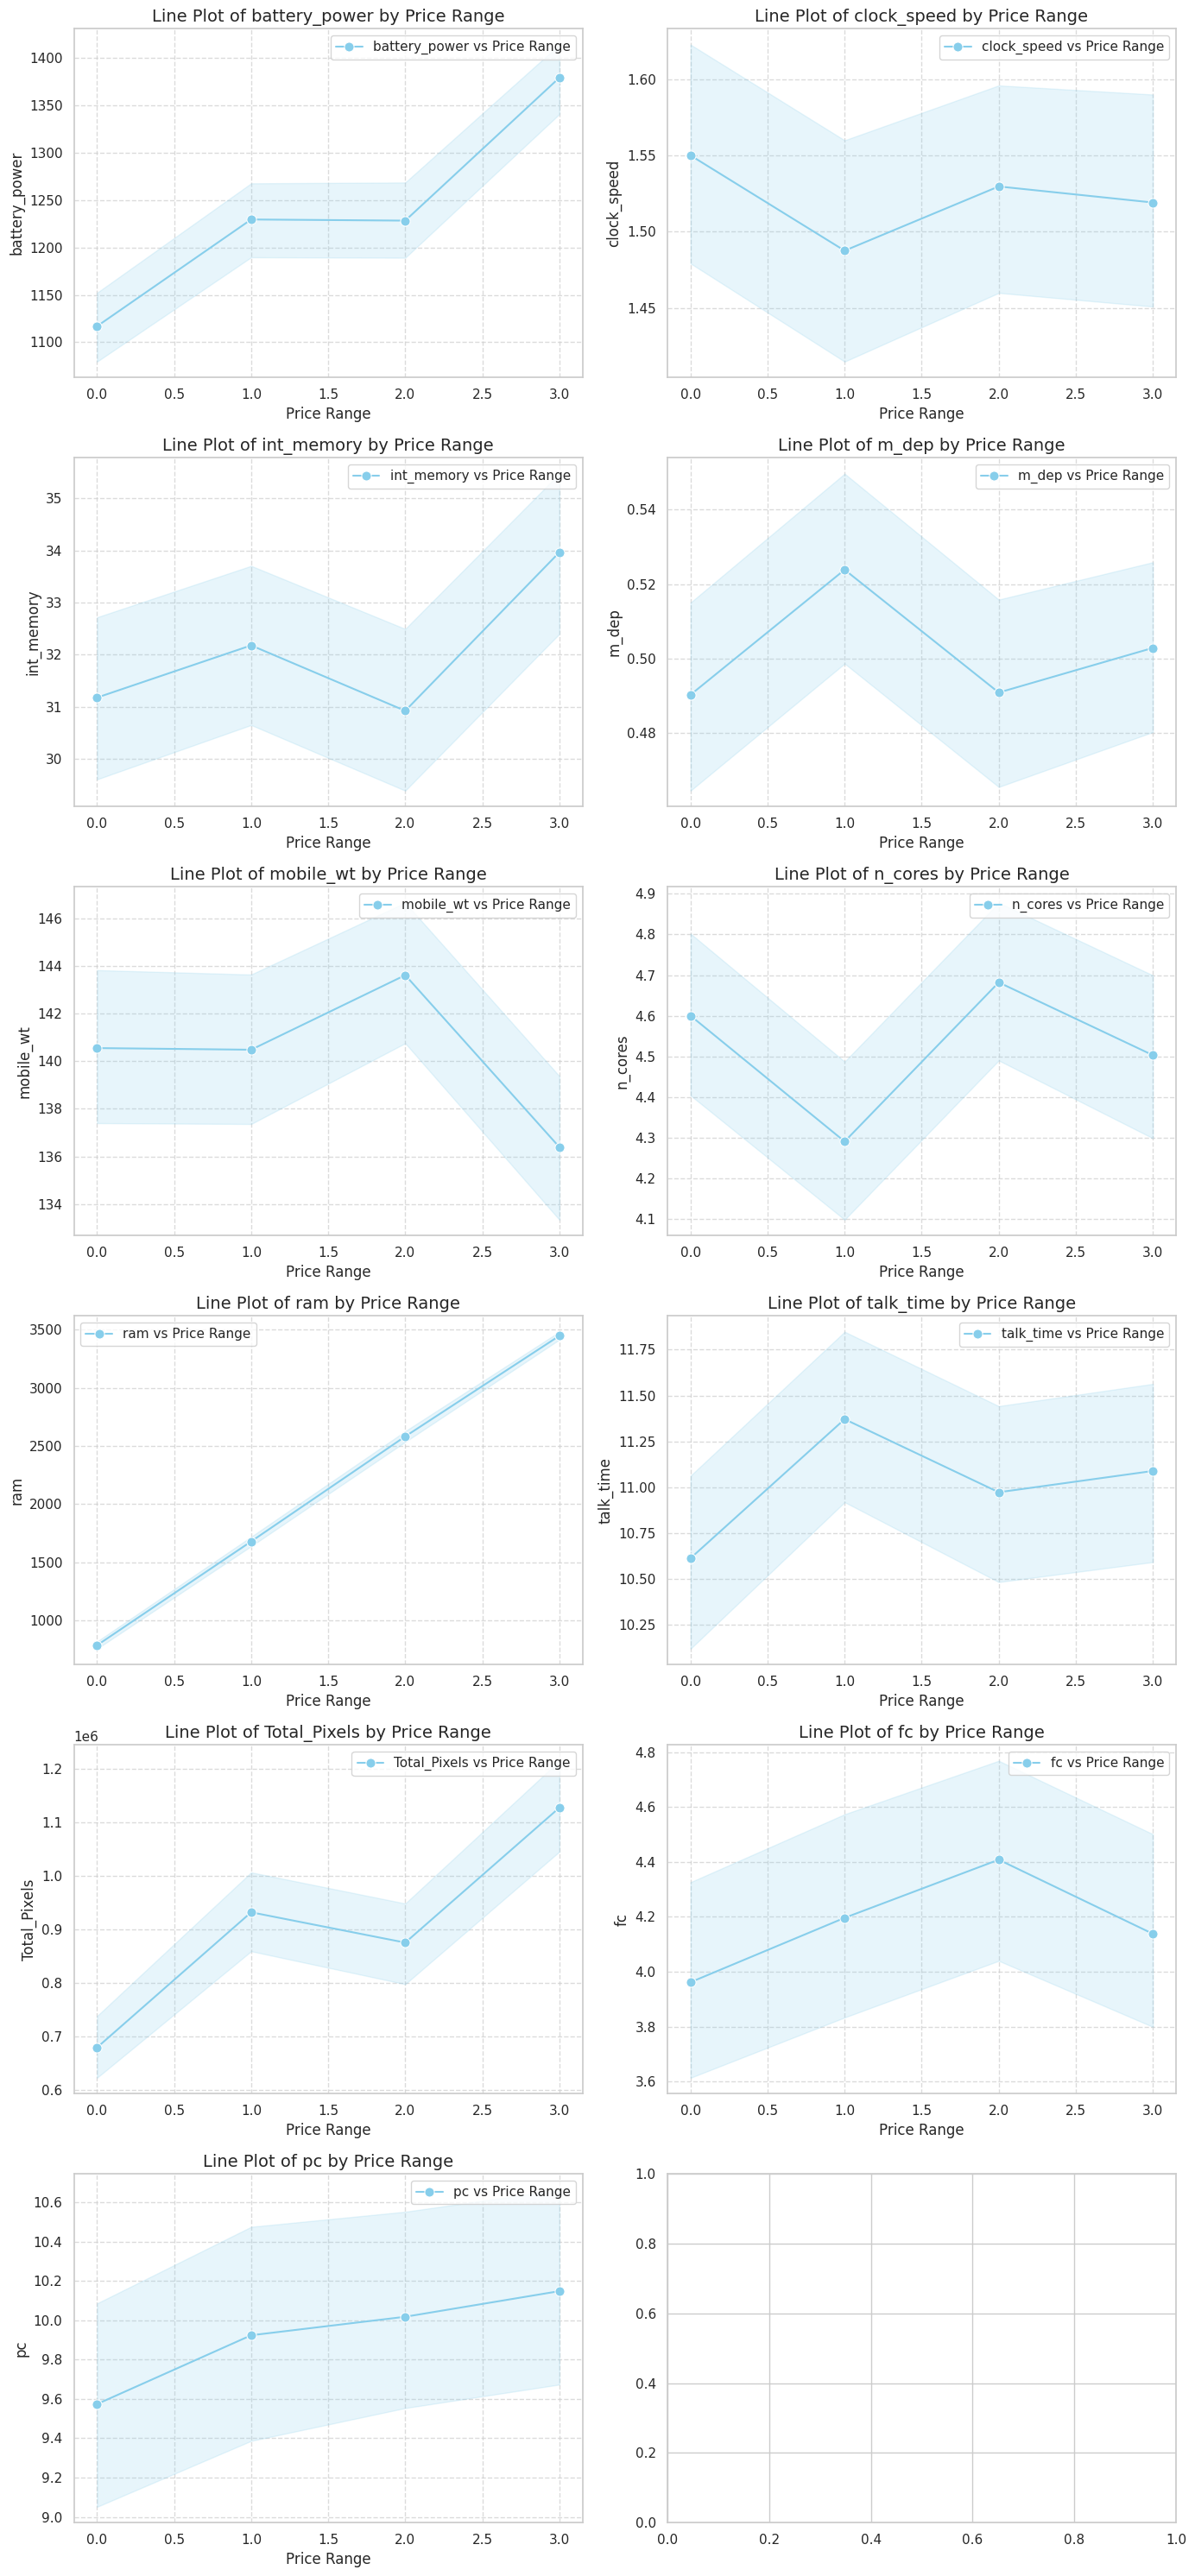

In [88]:
list_1 = ['battery_power', 'clock_speed', 'int_memory', 'm_dep', 'mobile_wt', 'n_cores', 'ram', 'talk_time', 'Total_Pixels', 'fc', 'pc']

sns.set(style="whitegrid")  # Set the seaborn style

# Set the number of rows and columns for subplots
rows = len(list_1) // 2 + len(list_1) % 2
cols = 2

# Create subplots
fig, axes = plt.subplots(rows, cols, figsize=(14, 5 * rows))

# Flatten the axes array for ease of indexing
axes = axes.flatten()

for i, var in enumerate(list_1):
    # Plot each variable in a subplot
    sns.lineplot(x='price_range', y=var, data=mobile_df, color='skyblue', marker='o', markersize=8, label=f'{var} vs Price Range', ax=axes[i])

    title = f'Line Plot of {var} by Price Range'
    axes[i].set_title(title, fontsize=14)

    axes[i].set_xlabel('Price Range', fontsize=12)
    axes[i].set_ylabel(var, fontsize=12)

    axes[i].legend()
    axes[i].grid(True, linestyle='--', alpha=0.7)

# Adjust layout for better spacing
plt.tight_layout()
plt.show()


**Insights:**
* We observe a positive correlation between RAM capacity and Price Range, indicating that as the RAM capacity increases, the mobile phone's price also tends to increase.

* Battery Power and Display Resolution show a notable positive relationship with Price Range, suggesting that higher values of these features correspond to higher mobile prices.

* Front Camera and Primary Camera exhibit a modest positive correlation with Price Range. An improvement in camera quality is associated with a positive impact on the Price Range.

* On the other hand, features like 'clock_speed', 'int_memory', 'm_dep', 'mobile_wt', 'n_cores', and 'talk_time' do not significantly influence the Price Range of mobile phones.

**7.Distribuion of Battery Power Within each Price Range**

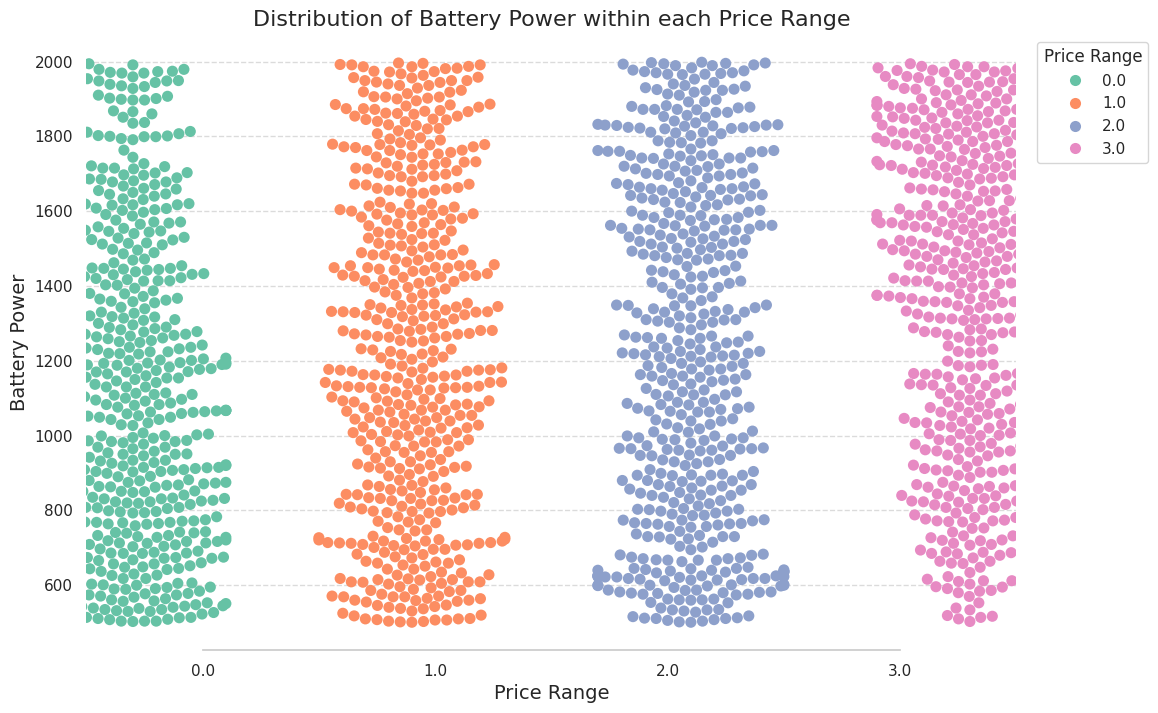

In [89]:
plt.figure(figsize=(12, 8))
sns.swarmplot(data=mobile_df, x='price_range', y='battery_power', hue='price_range', palette='Set2', dodge=True, size=8, edgecolor='black')

plt.title('Distribution of Battery Power within each Price Range', fontsize=16)
plt.xlabel('Price Range', fontsize=14)
plt.ylabel('Battery Power', fontsize=14)

plt.legend(title='Price Range', title_fontsize='12', loc='upper right', bbox_to_anchor=(1.15, 1))

plt.grid(axis='y', linestyle='--', alpha=0.7)
sns.despine(trim=True, left=True)

plt.show()

Insights:
* There is a scarcity of mobile phones in the lower price range that offer high battery power. Acquiring mobile phones with substantial battery capacity appears to require a higher financial investment.
* The positive correlation between battery power and price range suggests that manufacturers may prioritize incorporating larger batteries into higher-priced mobile phones to meet the demand for extended battery life.

**Scatter Plot of Total Pixels vs Price Range**

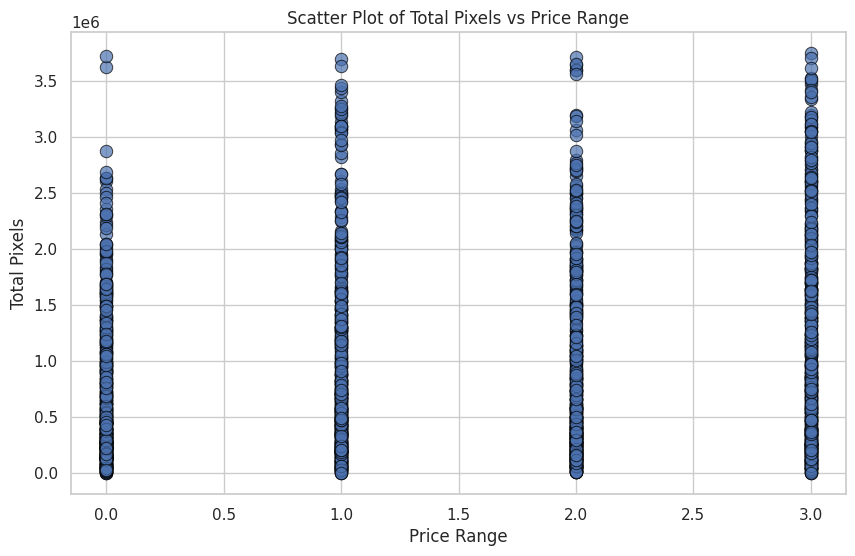

In [90]:
plt.figure(figsize=(10, 6))
sns.scatterplot(x='price_range', y='Total_Pixels', data=mobile_df, palette='Set1', alpha=0.7, edgecolor='black', s=80)

# Add labels and title
plt.xlabel('Price Range')
plt.ylabel('Total Pixels')
plt.title('Scatter Plot of Total Pixels vs Price Range')

# Display the plot
plt.show()

Insights:
* A subtle positive relationship has been observed, indicating that there are limited options for mobile phones with high display resolution in the lower price range. Investing in mobile phones with superior display resolution seems to come with a higher price tag.
* The observed correlation suggests that manufacturers may prioritize integrating advanced display technologies into higher-priced mobile phones to cater to consumers seeking enhanced visual experiences. This could be driven by the cost of implementing and maintaining high-resolution displays, contributing to the overall pricing of such devices.

**9.Binary categorical variables with respect to Price Range**

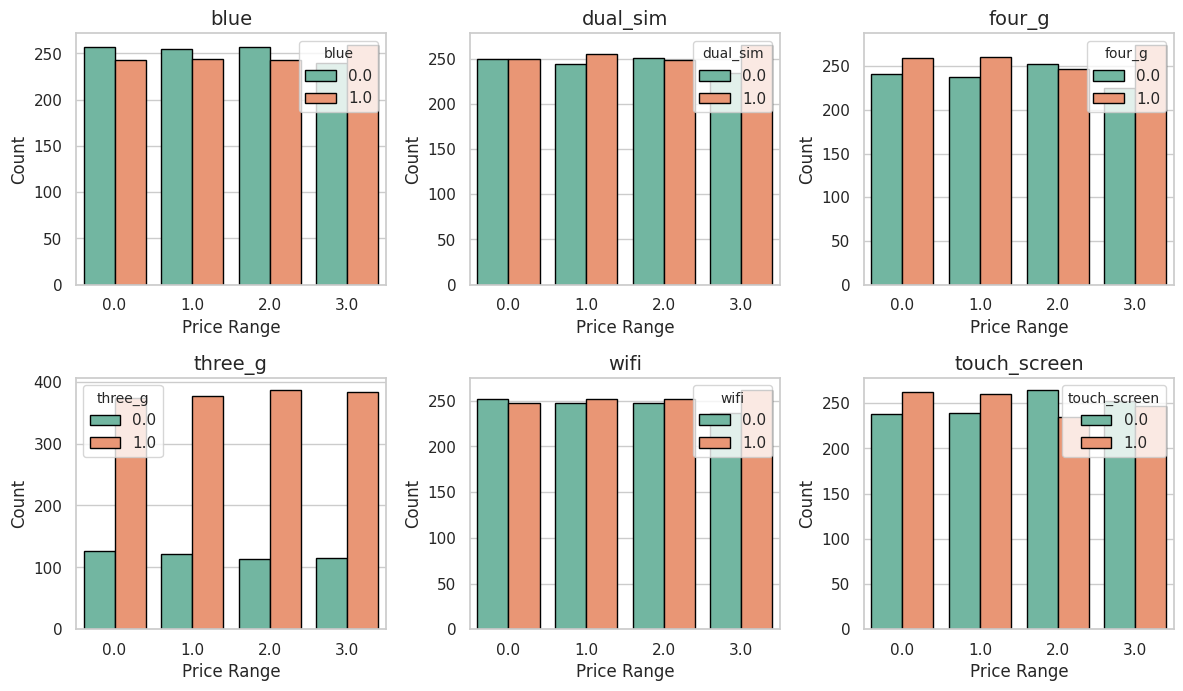

In [94]:
plt.figure(figsize=(12, 10))

rows = 3
col = 3
count = 1
var_list = ['blue', 'dual_sim', 'four_g', 'three_g', 'wifi', 'touch_screen']

for var in var_list:
    plt.subplot(rows, col, count)
    sns.countplot(x='price_range', data=mobile_df, hue=mobile_df[var], palette='Set2', edgecolor='black')

    plt.title(var, fontsize=14)
    plt.xlabel('Price Range', fontsize=12)
    plt.ylabel('Count', fontsize=12)
    plt.legend(title=var, title_fontsize='10')

    plt.tight_layout()
    count = count + 1

plt.show()

**Insights:**
* Mobile phones equipped with Four_G network capabilities, dual SIM functionality, and WiFi connectivity tend to be priced slightly higher than other mobiles.
* The observed price premium on mobile phones featuring Four_G, dual SIM, and WiFi functionalities may stem from increased manufacturing costs associated with incorporating these sought-after features. Additionally, consumers may perceive these attributes as valuable enhancements, influencing manufacturers to position such devices as premium options in the market.

**10. Heatmap**

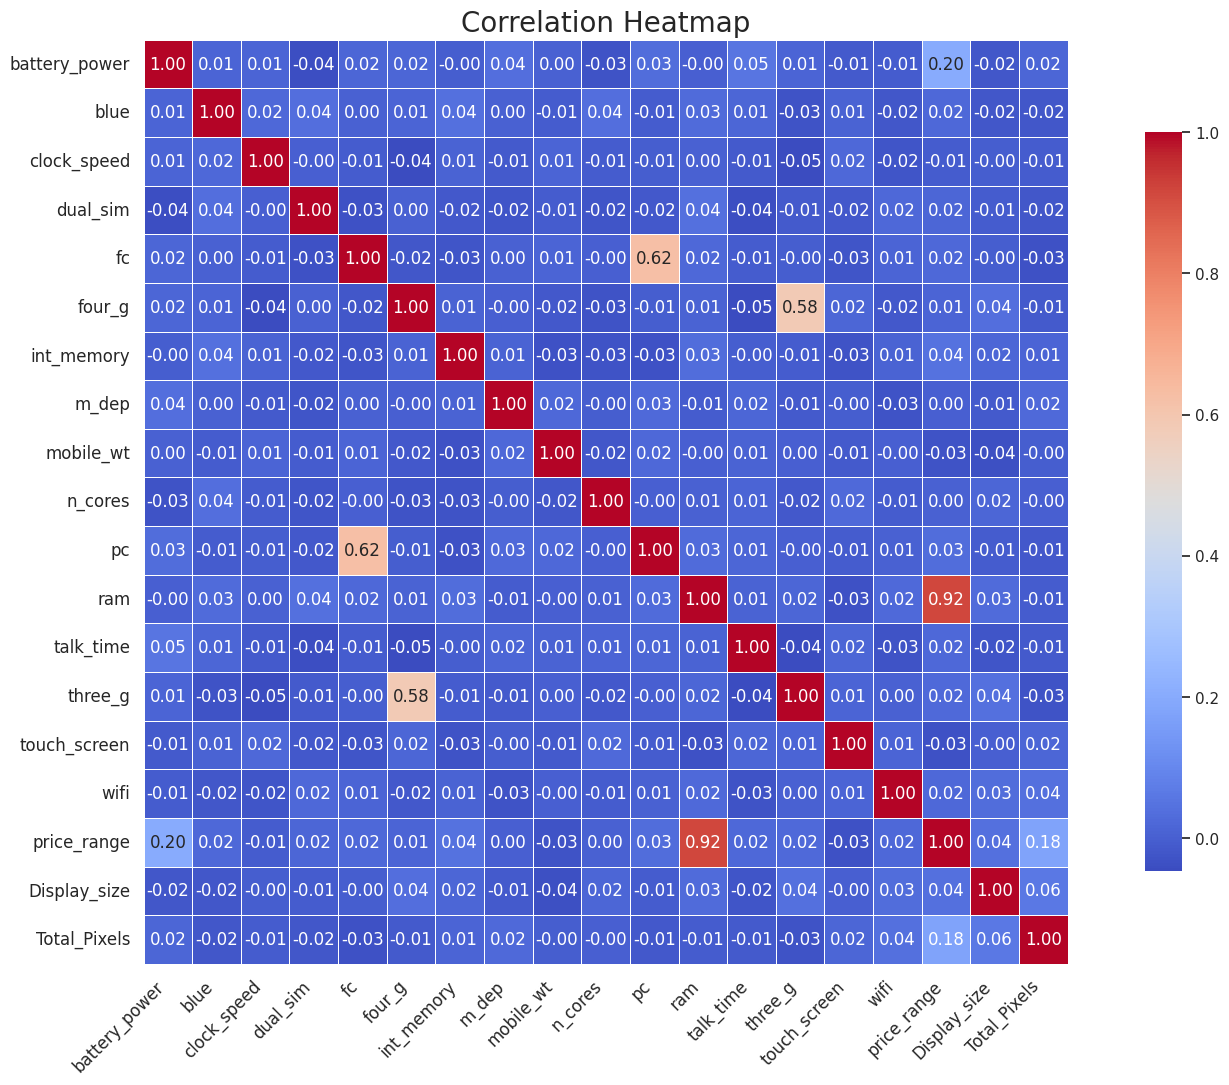

In [97]:
corr = mobile_df.corr()

plt.figure(figsize=(20, 12))
sns.heatmap(corr, annot=True, fmt=".2f", cmap="coolwarm", linewidths=0.5, square=True, cbar_kws={"shrink": 0.8})

plt.title('Correlation Heatmap', fontsize=20)
plt.xticks(rotation=45, ha='right', fontsize=12)
plt.yticks(rotation=0, fontsize=12)

plt.show()

**Insights:**

* There is a noteworthy and robust positive correlation observed between a mobile phone's RAM capacity and its corresponding price range. This trend indicates that consumers are inclined to invest more in phones featuring higher RAM capacities.
 * **Hypothesis:**
 The strong positive correlation suggests a consumer preference for enhanced performance and multitasking capabilities associated with higher RAM capacities, potentially driving manufacturers to price such devices at a premium.

* The price of a mobile phone demonstrates a positive correlation with its battery power, implying that devices equipped with higher battery capacities tend to command slightly higher prices. This trend reflects consumers' preference for mobile phones offering extended battery life.
  * **Hypothesis:**The positive correlation suggests that consumers prioritize battery life when making purchasing decisions. Manufacturers may price mobile phones with larger battery capacities higher to meet this demand and showcase their devices as enduring and reliable.


* A positive correlation is evident between a mobile phone's price and its display resolution. This correlation underscores the market's recognition of enhanced visual quality in phones with higher resolutions, influencing consumers to perceive these options as premium choices.
  * **Hypothesis:**
  The positive correlation implies a consumer preference for devices with superior display quality. Manufacturers may strategically position mobile phones with higher resolutions as premium products, aligning with consumer expectations for a visually immersive experience.




* There is a positive correlation between the presence of a front camera and the primary camera in mobile phones. Mobile phones featuring a primary camera are likely to include a front camera as well. This correlation highlights the industry practice of offering both front and primary cameras in tandem.
  *  **Hypothesis:**
  The positive correlation suggests that the inclusion of both front and primary cameras has become a standard feature in mobile phones, driven by consumer demand for versatile photography options and evolving industry standards.